#### Realizando el analisis de parte del dataset post etl, por lo que esta mas limpio y enfocado a el objetivo final del proyecto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("D:/PF_Grupo06_Henry/data/DataWarehouse/Yelp-CF.csv")

In [3]:
df.head(3)




,user_id,business_id,stars_comment,text,date,name,address,city,state,latitude,longitude,review_count,categories,stars_business
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,40.210196,-75.223639,169,"Restaurants, Breakfast & Brunch, Food, Juice B...",3.0
1,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,This is the second time we tried turning point...,2017-05-13 17:06:55,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,40.210196,-75.223639,169,"Restaurants, Breakfast & Brunch, Food, Juice B...",3.0
2,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4.0,The place is cute and the staff was very frien...,2017-08-08 00:58:18,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,40.210196,-75.223639,169,"Restaurants, Breakfast & Brunch, Food, Juice B...",3.0


In [4]:
df["stars_business"].sum()

21418382.5

Outliers en número de reviews:

<Axes: xlabel='review_count'>

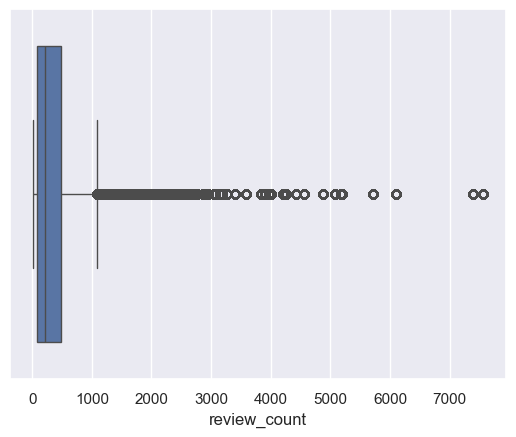

In [5]:
sns.boxplot(x=df['review_count'])

Se ve graficamente una gran cantidad de outliers

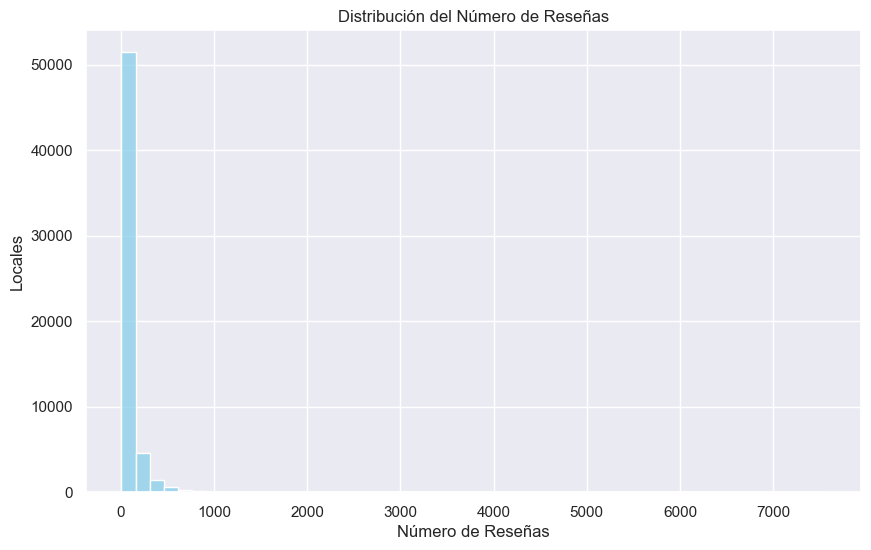

In [32]:
locaciones = df.drop_duplicates(subset=["business_id"])

plt.figure(figsize=(10, 6))
sns.histplot(locaciones['review_count'], bins=50, kde=False, color='skyblue')
plt.xlabel('Número de Reseñas')
plt.ylabel('Locales')
plt.title('Distribución del Número de Reseñas')
plt.show()



#### Aca podemos ver que se debe a que la inmensa mayoria de los locales tienen menos de 500 reviews, mientras que algunos superan los miles

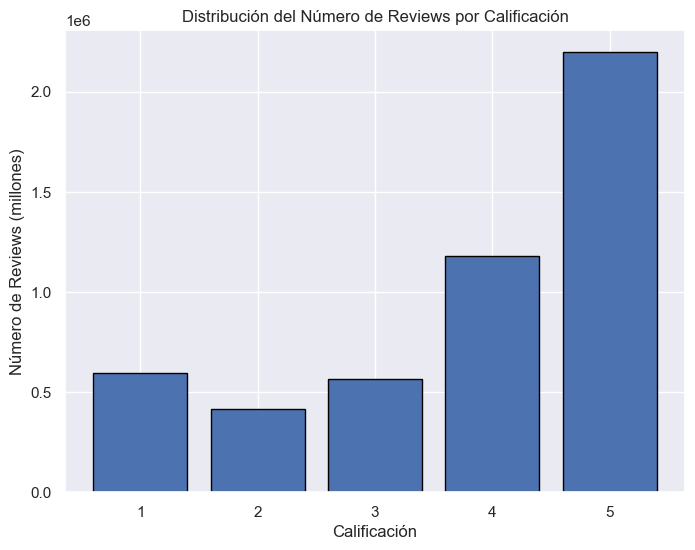

In [17]:
# Supongamos que 'df' es tu DataFrame y 'stars_comment' es la columna que contiene las calificaciones
stars_count = df['stars_comment'].value_counts()

# Crear un histograma apilado
plt.figure(figsize=(8, 6))
plt.bar(stars_count.index, stars_count, edgecolor='black')

# Configurar el título y las etiquetas de los ejes
plt.title('Distribución del Número de Reviews por Calificación')
plt.xlabel('Calificación')
plt.ylabel('Número de Reviews (decenas de millones)')

# Añadir leyenda


# Mostrar el histograma
plt.show()

#### Notamos la distribución de calificacion por cantidad de reviews, viendo una clara predominancia de reviews con 5 estrellas

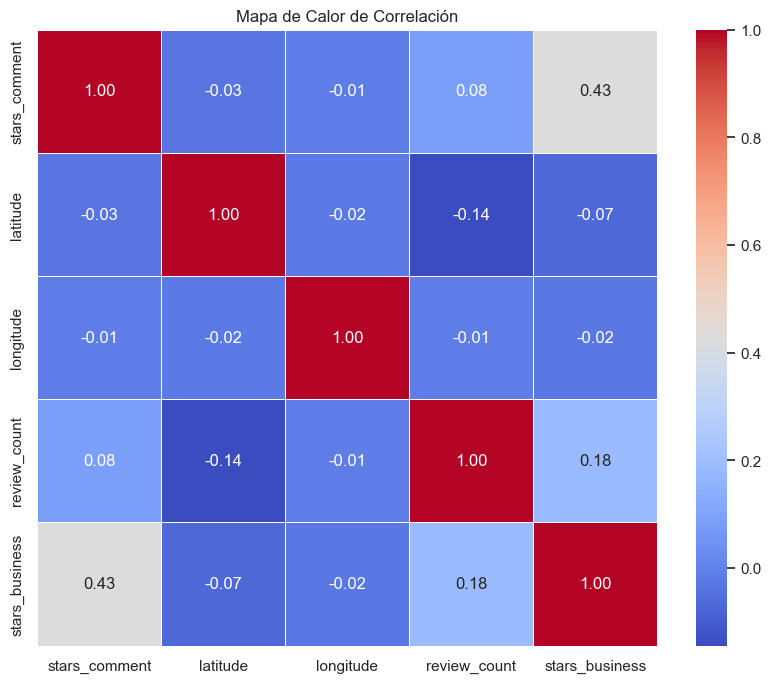

In [34]:
# Selecciona las columnas numéricas relevantes para el mapa de calor
columns_for_heatmap = df.select_dtypes(include=["int64", "float64"])

# Calcula la matriz de correlación
correlation_matrix = columns_for_heatmap.corr()

# Crea un mapa de calor usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

Mapa de calor para revisar la correlacion entre variables numericas, notamos que existe poca correlacion en general